## Steer Function Comparison
In this notebook, we examine the planners using different steer functions.

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
import sys, os
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def benchmark(steer_function: str, settings: [dict]):
    pool = MultipleMPB()
    for setting in settings:
        m = MPB()
        m.update(setting)
        m.set_steer_functions([steer_function])
        m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
        pool.benchmarks.append(m)

### Moving AI Scenarios

In [ ]:
scenario = 'Boston_1_1024'
num_scenarios = 50
steer_function = 'cc_reeds_shepp'
time_limit = 180

scenario_file = '/root/code/mpb/bin/moving_ai_scenarios/%s.map.scen' % scenario
if not os.path.exists(scenario_file):
    raise Exception("Scenario file \"%s\" could not be found." % scenario_file)

config = MPB.get_config()
config["benchmark.moving_ai.active"] = True
config["max_planning_time"] = time_limit
config["benchmark.moving_ai.create_border"] = False
# use point-based collision model for MovingAI scenarios
config["env.collision.collision_model"] = 0

pool = MultipleMPB()
for i in range(num_scenarios):
    m = MPB()
    config["benchmark.moving_ai.start"] = i - num_scenarios
    config["benchmark.moving_ai.end"] = i - num_scenarios
    config["benchmark.moving_ai.scenario"] = scenario_file    
    m.update(deepcopy(config))
    m.set_steer_functions([steer_function])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    #     m.set_planners(['theta_star'])
    #     m.set_planners(['sbpl_adstar'])
    pool.benchmarks.append(m)
pool.run_parallel("moving_ai_%s_%s" % (scenario, steer_function), processes=20, limit_memory=True)

Available memory: 250.14 GB, limiting each MPB process to 6.9% usage (17.37 GB).
Creating pool of 20 processes.
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_2 (log file at moving_ai_Boston_1_1024_cc_reeds_shepp/moving_ai_Boston_1_1024_cc_reeds_shepp_2.log)...
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_1 (log file at moving_ai_Boston_1_1024_cc_reeds_shepp/moving_ai_Boston_1_1024_cc_reeds_shepp_1.log)...
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_4 (log file at moving_ai_Boston_1_1024_cc_reeds_shepp/moving_ai_Boston_1_1024_cc_reeds_shepp_4.log)...
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_9 (log file at moving_ai_Boston_1_1024_cc_reeds_shepp/moving_ai_Boston_1_1024_cc_reeds_shepp_9.log)...
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_3 (log file at moving_ai_Boston_1_1024_cc_reeds_shepp/moving_ai_Boston_1_1024_cc_reeds_shepp_3.log)...
Running MPB with ID moving_ai_Boston_1_1024_cc_reeds_shepp_11 (log file at mov

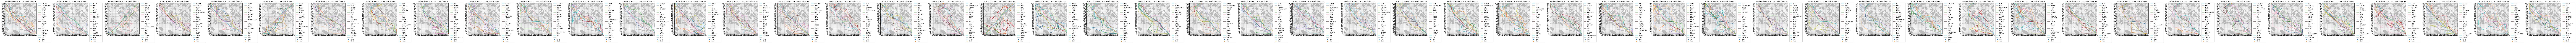

In [88]:
pool.visualize_trajectories(show_legend=True)

Successfully merged [moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_0_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_1_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_2_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_3_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_4_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_5_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_6_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_7_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_8_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_9_results.json, moving_ai_Boston_1_1024_reeds_shepp/moving_ai_Boston_1_1024_reeds_shepp_10_results.json, moving_ai_

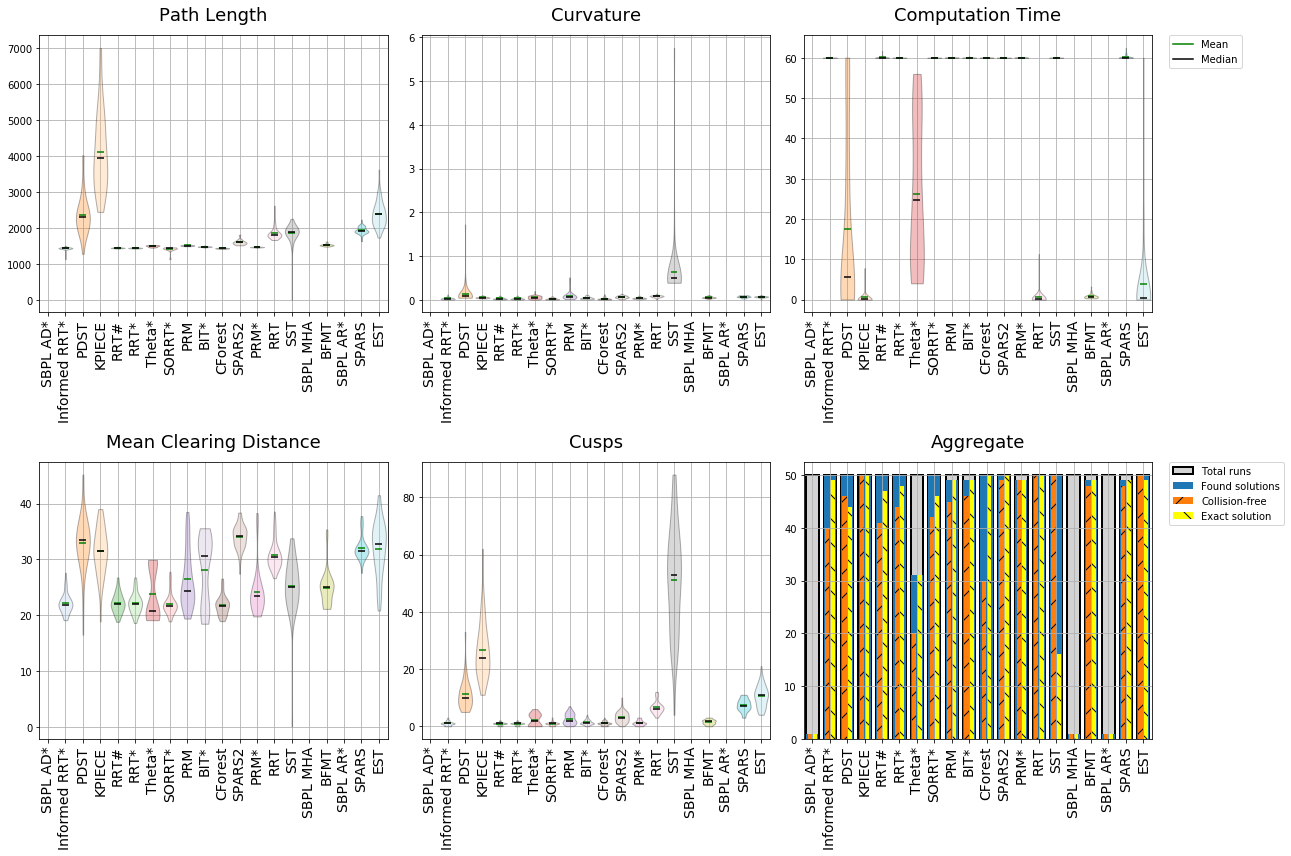

In [93]:
MPB.merge(pool.benchmarks, "moving_ai_%s_%s/total.json" % (scenario, steer_function), make_separate_runs=True)

Visualizing moving_ai_Boston_1_1024_reeds_shepp/total.json...
Saved moving_ai_Boston_1_1024_reeds_shepp/stats.pdf.


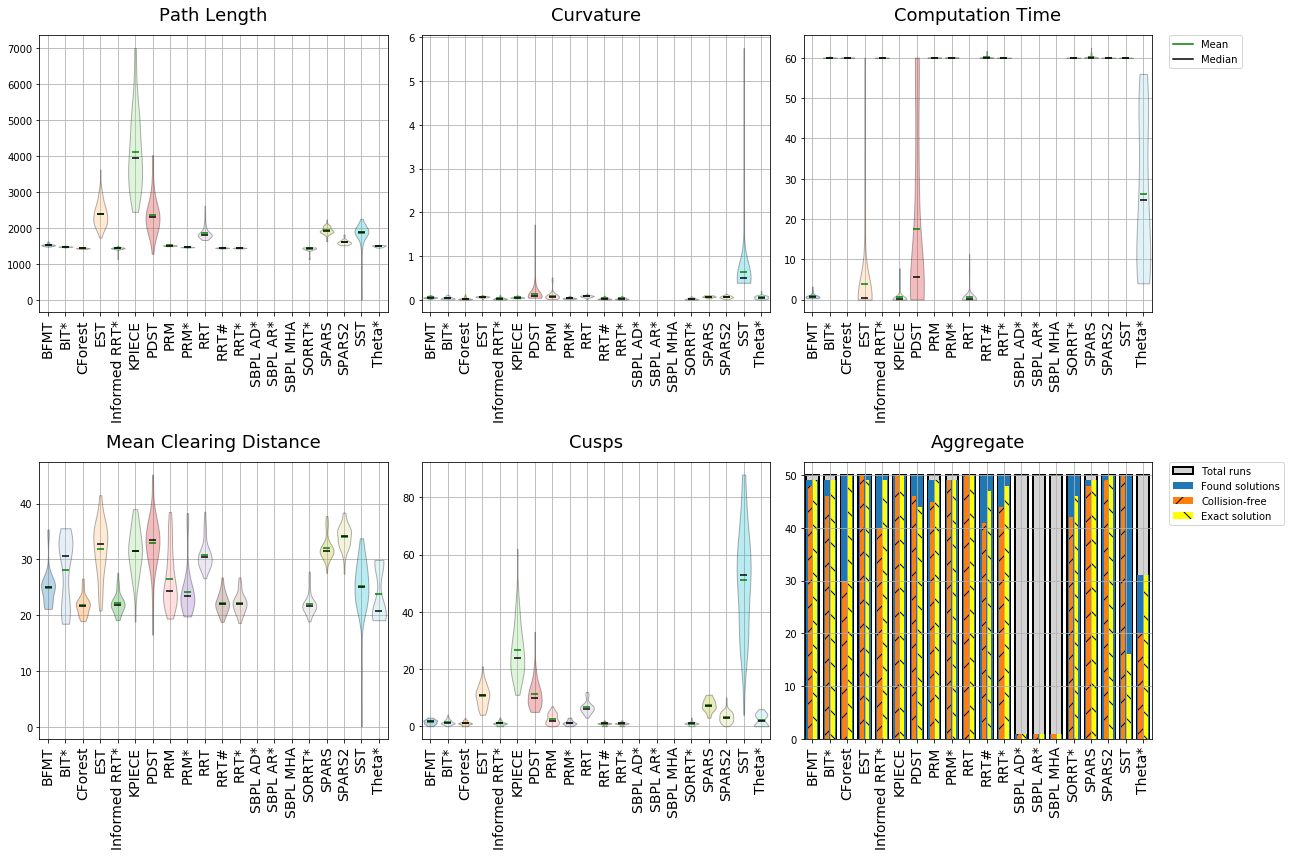

In [102]:
from plot_stats import plot_planner_stats
plot_planner_stats("moving_ai_%s_%s/total.json" % (scenario, steer_function),
                   save_file="moving_ai_%s_%s/stats.pdf" % (scenario, steer_function))

In [94]:
import json
from utils import convert_planner_name
planners = list(sorted(json.load(open(pool.benchmarks[0].results_filename))["runs"][0]["plans"].keys(), key=convert_planner_name))
print("Planners:", len(planners), planners)
print()
def latexify(planner: str):
    planner = convert_planner_name(planner)
    planner = planner.replace('#', '\\#')
    planner = planner.replace('*', '${}^*$')
    planner = planner.replace('_', '\\_')
    return planner
# print('& \\databar{91.41} & \\databar{90.81} & \\databar{38.76} & \\databar{91.41} & \\databar{90.81} & \\databar{38.76}\\\\\n'.join(map(latexify, planners)))

Planners: 20 ['BFMT', 'kBITstar', 'CForest', 'EST', 'InformedRRTstar', 'KPIECE1', 'PDST', 'PRM', 'PRMstar', 'RRT', 'RRT#', 'RRTstar', 'SBPL_ADstar', 'SBPL_ARstar', 'SBPL_MHA', 'SORRTstar', 'SPARS', 'SPARStwo', 'SST', 'Theta*']



In [95]:
metrics = ['path_found', 'planning_time', 'path_length', 'curvature', 'cusps']
stats = { metric: {planner: [] for planner in planners} for metric in metrics}
with open("moving_ai_%s_%s/total.json" % (scenario, steer_function), 'r') as rf:
    for run in json.load(rf)["runs"]:
        for planner, plan in run["plans"].items():
            for metric in metrics:
                if metric == 'path_found':
                    stats[metric][planner].append(int(plan["stats"][metric]))
                elif metric == "cusps":
                    stats[metric][planner].append(len(plan["stats"][metric]))
                else:
                    stats[metric][planner].append(plan["stats"][metric])

In [96]:
import numpy as np
def safe_mean(xs):
    return np.mean([x for x in xs if x is not None and not np.isnan(x)])
def safe_std(xs):
    return np.std([x for x in xs if x is not None and not np.isnan(x)])
def safe_sum(xs):
    return np.sum([x for x in xs if x is not None and not np.isnan(x)])

optimal_percentile = .05

metric_properties = {
    'path_found': {
        'sum': True
    },
    'planning_time': {
        'show_std': True,
        'max': config["max_planning_time"],
        'highlight_optimum': True
    },
    'path_length': {
        'show_std': True
    },
    'curvature': {
        'show_std': True,
        'minimize': True
    },
    'cusps': {
        'minimize': True,
        'sum': True
    }
}

for i, metric in enumerate(metrics):
    if "min" not in metric_properties[metric]:
        metric_properties[metric]["min"] = min([safe_mean(stats[metric][planner]) for planner in planners])
    if "max" not in metric_properties[metric]:
        metric_properties[metric]["max"] = max([safe_mean(stats[metric][planner]) for planner in planners])

for planner in planners:
    print(latexify(planner).ljust(40), '& %', convert_planner_name(planner))
    for i, metric in enumerate(metrics):
        mu = safe_mean(stats[metric][planner])
        line = '\t{\\databar{%.2f}}' % (min(1., mu / metric_properties[metric]["max"]))
        if metric_properties[metric].get("show_std", False):
            line += '\t%.2f \\pm %.2f' % (mu, safe_std(stats[metric][planner]))
        elif metric_properties[metric].get("percent", False):
            line += '\t%i \\%%' % (mu * 100)
        elif metric_properties[metric].get("sum", False):
            line += '\t%i' % (safe_sum(stats[metric][planner]))
        else:
            line += '\t%.2f' % safe_mean(stats[metric][planner])
        print(line, ('&' if i < len(metrics)-1 else '%'))
    print('\\\\')

BFMT                                     & % BFMT
	{\databar{0.98}}	49 &
	{\databar{0.01}}	0.85 \pm 0.55 &
	{\databar{0.37}}	1530.10 \pm 31.24 &
	{\databar{0.07}}	0.06 \pm 0.02 &
	{\databar{0.03}}	73 %
\\
BIT${}^*$                                & % BIT*
	{\databar{0.98}}	49 &
	{\databar{1.00}}	60.04 \pm 0.07 &
	{\databar{0.36}}	1481.53 \pm 10.86 &
	{\databar{0.05}}	0.05 \pm 0.03 &
	{\databar{0.03}}	66 %
\\
CForest                                  & % CForest
	{\databar{1.00}}	50 &
	{\databar{1.00}}	60.03 \pm 0.03 &
	{\databar{0.35}}	1435.93 \pm 10.29 &
	{\databar{0.04}}	0.03 \pm 0.03 &
	{\databar{0.02}}	48 %
\\
EST                                      & % EST
	{\databar{1.00}}	50 &
	{\databar{0.06}}	3.85 \pm 10.26 &
	{\databar{0.58}}	2388.18 \pm 355.86 &
	{\databar{0.08}}	0.07 \pm 0.02 &
	{\databar{0.21}}	531 %
\\
Informed RRT${}^*$                       & % Informed RRT*
	{\databar{1.00}}	50 &
	{\databar{1.00}}	60.00 \pm 0.01 &
	{\databar{0.35}}	1435.37 \pm 44.96 &
	{\databar{0.04}}	

Visualizing moving_ai_reeds_shepp/moving_ai_reeds_shepp_19_results.json
Planner SBPL_ADstar found no solution!
Planner SBPL_ARstar found no solution!
Planner SBPL_MHA found no solution!


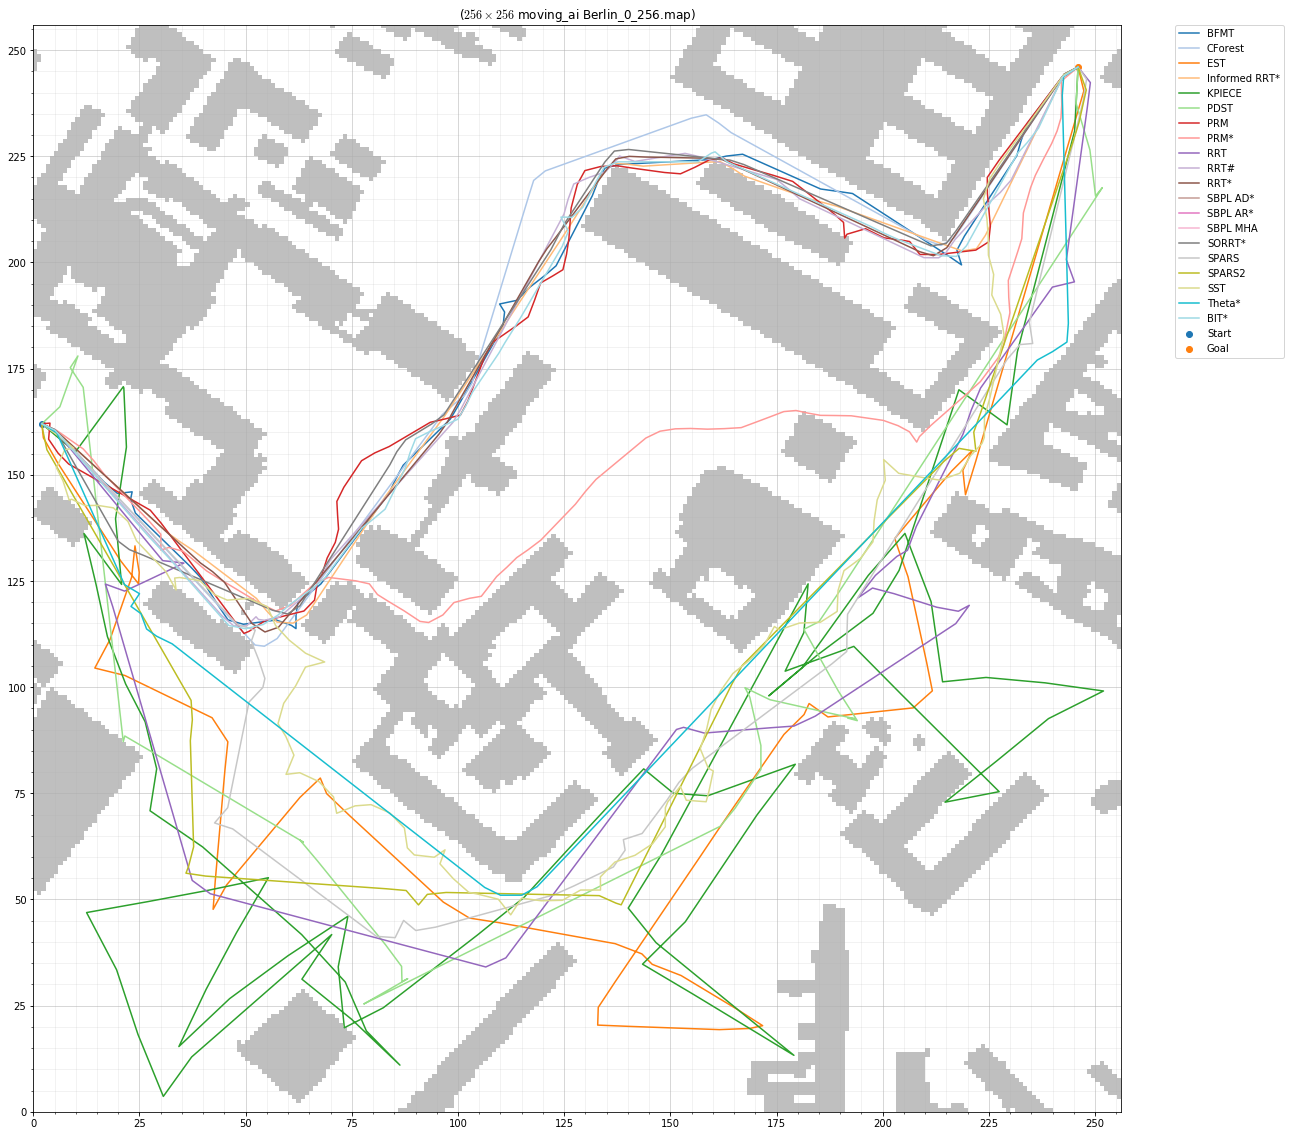

In [41]:
pool.benchmarks[19].visualize_trajectories(fig_width=20, fig_height=20)